In [5]:
import pandas as pd

In [6]:
df_org = pd.read_csv(r"C:\Users\Usuario\OneDrive\Escritorio\TFG\Imaris\LinearRegression\heartRisk (1).csv")
df_org





,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1
...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,42,110,175,67,3.9
996,0,1,0,1,0,75,123,130,56,23.9
997,1,1,1,0,1,76,178,179,30,61.3
998,0,1,1,1,0,65,139,169,66,32.3


In [7]:


#We eliminate column "IsBlack" as the added risk is not strong enough to take it into account in this model
df = df_org.drop("isBlack", axis=1)

#We eliminate column "isHypertensive" as we already have the sistolic pressure value, which is more accurate as its no defined by an 
#arbitrary criteria

df = df.drop("isHypertensive", axis= 1)








In [8]:


df['LDL'] = df['Cholesterol']-df['HDL']



df['ApoB'] = (df['Cholesterol']- df['HDL'])/5


df = df.drop("Cholesterol", axis=1)
df= df.drop("HDL", axis = 1) 

df

,isMale,isSmoker,isDiabetic,Age,Systolic,Risk,LDL,ApoB
0,1,0,1,49,101,11.1,149,29.8
1,0,0,1,69,167,30.1,96,19.2
2,0,1,1,50,181,37.6,88,17.6
3,1,1,1,42,145,13.2,120,24.0
4,0,1,0,66,134,15.1,136,27.2
...,...,...,...,...,...,...,...,...
995,1,1,1,42,110,3.9,108,21.6
996,0,0,1,75,123,23.9,74,14.8
997,1,1,0,76,178,61.3,149,29.8
998,0,1,1,65,139,32.3,103,20.6


In [9]:


df["Riesgo"] = df["Risk"].apply (lambda x : 'Sí' if x > 13.5 else "No")

df= df.drop(['Risk'], axis = 1)

df

,isMale,isSmoker,isDiabetic,Age,Systolic,LDL,ApoB,Riesgo
0,1,0,1,49,101,149,29.8,No
1,0,0,1,69,167,96,19.2,Sí
2,0,1,1,50,181,88,17.6,Sí
3,1,1,1,42,145,120,24.0,No
4,0,1,0,66,134,136,27.2,Sí
...,...,...,...,...,...,...,...,...
995,1,1,1,42,110,108,21.6,No
996,0,0,1,75,123,74,14.8,Sí
997,1,1,0,76,178,149,29.8,Sí
998,0,1,1,65,139,103,20.6,Sí


In [10]:


df.isnull().sum()



isMale        0
isSmoker      0
isDiabetic    0
Age           0
Systolic      0
LDL           0
ApoB          0
Riesgo        0
dtype: int64

In [11]:


df_numeric = df[['Age', 'Systolic', 'LDL', 'ApoB']]

df_numeric

,Age,Systolic,LDL,ApoB
0,49,101,149,29.8
1,69,167,96,19.2
2,50,181,88,17.6
3,42,145,120,24.0
4,66,134,136,27.2
...,...,...,...,...
995,42,110,108,21.6
996,75,123,74,14.8
997,76,178,149,29.8
998,65,139,103,20.6


In [12]:
#We use Interquartile range to detect outliers

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3-Q1



limite_inferior = Q1 - 1.5  * IQR
limite_superior = Q3 + 1.5 * IQR

print(limite_inferior, limite_superior)
outliers = ((df_numeric < limite_inferior) | 
            (df_numeric > limite_superior))

outliers_values = df_numeric[outliers]

print(outliers.sum())

Age         19.0
Systolic    36.0
LDL         14.5
ApoB         2.9
dtype: float64 Age          99.0
Systolic    252.0
LDL         194.5
ApoB         38.9
dtype: float64
Age         0
Systolic    0
LDL         0
ApoB        0
dtype: int64


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Divide data in independent variables (x) and variable to predict (y)
X = df[['isMale', 'isSmoker', 'isDiabetic', 'Age', 'Systolic', 'LDL', 'ApoB']]
y = df['Riesgo']  

# Split data in training data and test data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Initialize model
model = LogisticRegression(max_iter=1000)  


# Train model with training data
model.fit(X_train, y_train)

# Test with test data 
predictions = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")




Model Accuracy: 0.85375


In [14]:
print(model.coef_)
print(model.intercept_)

[[1.71015416 1.6421808  1.73118385 0.21885354 0.04739863 0.0125108
  0.00250216]]
[-23.19956186]


In [15]:
df

,isMale,isSmoker,isDiabetic,Age,Systolic,LDL,ApoB,Riesgo
0,1,0,1,49,101,149,29.8,No
1,0,0,1,69,167,96,19.2,Sí
2,0,1,1,50,181,88,17.6,Sí
3,1,1,1,42,145,120,24.0,No
4,0,1,0,66,134,136,27.2,Sí
...,...,...,...,...,...,...,...,...
995,1,1,1,42,110,108,21.6,No
996,0,0,1,75,123,74,14.8,Sí
997,1,1,0,76,178,149,29.8,Sí
998,0,1,1,65,139,103,20.6,Sí


In [16]:
df_numeric = df.copy()

df_numeric['R'] = df_numeric['Riesgo'].map({'Sí' : 1, 'No' : 0})

df_numeric = df_numeric.drop("Riesgo", axis = 1)
print(df_numeric.head())
print(df.head())

   isMale  isSmoker  isDiabetic  Age  Systolic  LDL  ApoB  R
0       1         0           1   49       101  149  29.8  0
1       0         0           1   69       167   96  19.2  1
2       0         1           1   50       181   88  17.6  1
3       1         1           1   42       145  120  24.0  0
4       0         1           0   66       134  136  27.2  1
   isMale  isSmoker  isDiabetic  Age  Systolic  LDL  ApoB Riesgo
0       1         0           1   49       101  149  29.8     No
1       0         0           1   69       167   96  19.2     Sí
2       0         1           1   50       181   88  17.6     Sí
3       1         1           1   42       145  120  24.0     No
4       0         1           0   66       134  136  27.2     Sí


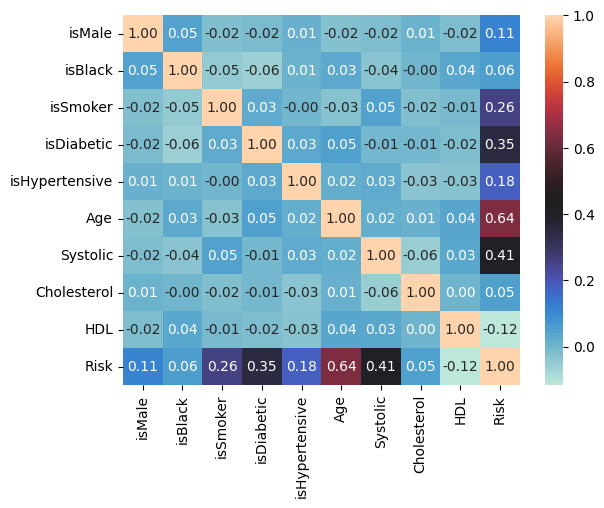

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_df = df_org.corr()


sns.heatmap(correlation_df, annot=True, cmap ='icefire', fmt=".2f")
plt.show()


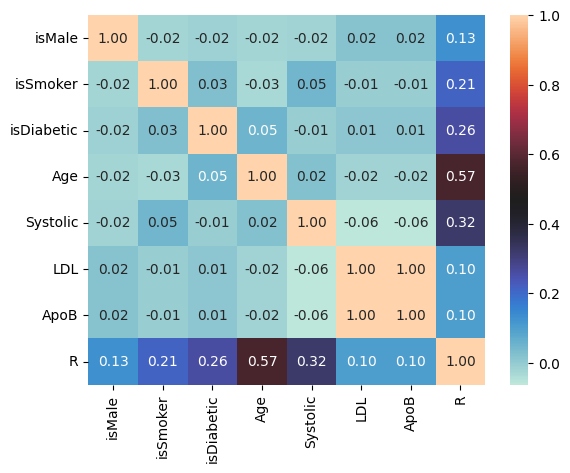

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_df_numeric = df_numeric.corr()


sns.heatmap(correlation_df_numeric, annot=True, cmap ='icefire', fmt=".2f")
plt.show()


In [19]:
print(model.coef_)
print(model.intercept_)

[[1.71015416 1.6421808  1.73118385 0.21885354 0.04739863 0.0125108
  0.00250216]]
[-23.19956186]


In [20]:
df.head()

,isMale,isSmoker,isDiabetic,Age,Systolic,LDL,ApoB,Riesgo
0,1,0,1,49,101,149,29.8,No
1,0,0,1,69,167,96,19.2,Sí
2,0,1,1,50,181,88,17.6,Sí
3,1,1,1,42,145,120,24.0,No
4,0,1,0,66,134,136,27.2,Sí


In [21]:

#Let´s create a matrix which combines and test all posible values for w and b, in order to determine the optimal

import numpy as np



array = np.mgrid[1.5:2:0.15, 1.5:2:0.15, 1.5:2:0.15, 
                 0:0.5: 0.15, -0.05:0.05:0.015, -0.05:0.05:0.015,
                   -0.003:0.003:0.015, -30:-20:1].reshape(8,-1).T


array_df = pd.DataFrame( data = array,
                        columns = ['male', 'smoker','diabetic', 
                                   'age', 'sistolic', 'LDL', 'ApoB', 'b'])

In [22]:
for col in array_df.columns:
    array_df[col] = np.round(array_df[col], 6)


array_df

,male,smoker,diabetic,age,sistolic,LDL,ApoB,b
0,1.50,1.50,1.50,0.00,-0.05,-0.05,-0.003,-30.0
1,1.50,1.50,1.50,0.00,-0.05,-0.05,-0.003,-29.0
2,1.50,1.50,1.50,0.00,-0.05,-0.05,-0.003,-28.0
3,1.50,1.50,1.50,0.00,-0.05,-0.05,-0.003,-27.0
4,1.50,1.50,1.50,0.00,-0.05,-0.05,-0.003,-26.0
...,...,...,...,...,...,...,...,...
125435,1.95,1.95,1.95,0.45,0.04,0.04,-0.003,-25.0
125436,1.95,1.95,1.95,0.45,0.04,0.04,-0.003,-24.0
125437,1.95,1.95,1.95,0.45,0.04,0.04,-0.003,-23.0
125438,1.95,1.95,1.95,0.45,0.04,0.04,-0.003,-22.0


In [23]:
df_independiente = df.copy()

df_independiente = df_independiente.drop('Riesgo', axis = 1)

df_independiente

,isMale,isSmoker,isDiabetic,Age,Systolic,LDL,ApoB
0,1,0,1,49,101,149,29.8
1,0,0,1,69,167,96,19.2
2,0,1,1,50,181,88,17.6
3,1,1,1,42,145,120,24.0
4,0,1,0,66,134,136,27.2
...,...,...,...,...,...,...,...
995,1,1,1,42,110,108,21.6
996,0,0,1,75,123,74,14.8
997,1,1,0,76,178,149,29.8
998,0,1,1,65,139,103,20.6


In [24]:
w = array_df[['male', 'smoker', 'diabetic', 'age','LDL', 'ApoB' ]].values

b = array_df[['b']].values


In [ ]:
# Due to the size of the dataset and the number of variables, it is not feasible to apply the
# loss function to estimate the optimal weights for each variable (w) and the
# intercept b, but this is what the function would look like.

#funcion_de_perdida: df,series, series -> float

def funcion_de_perdida(df_independiente, w, b):
    
    z = np.dot(df_independiente.values, w) + b
    sigmoid = 1 / (1 + np.exp(-z))
    loss_xi = -df_numeric['R'] * np.log(sigmoid) - (1 - df_numeric['R']) * np.log(1 - sigmoid)
    j_cost = np.mean(loss_xi)
    return j_cost


resultados = []
for index, row in array_df.iterrows():
    w_values = row[['male', 'smoker','diabetic', 'age', 'sistolic', 'LDL', 'ApoB']]
    b_value = row['b']
    costo = funcion_de_perdida(df_independiente, w_values, b_value)
    resultados.append(costo)


array_df['costo'] = resultados

In [ ]:
array_df.sort_values(by=['costo'])

,male,smoker,diabetic,age,sistolic,LDL,ApoB,b,costo
124931,1.95,1.95,1.95,0.3,0.04,0.025,-0.003,-29.0,0.315343
93571,1.80,1.95,1.95,0.3,0.04,0.025,-0.003,-29.0,0.317068
117091,1.95,1.80,1.95,0.3,0.04,0.025,-0.003,-29.0,0.319521
62211,1.65,1.95,1.95,0.3,0.04,0.025,-0.003,-29.0,0.319687
62220,1.65,1.95,1.95,0.3,0.04,0.040,-0.003,-30.0,0.319792
...,...,...,...,...,...,...,...,...,...
62720,1.80,1.50,1.50,0.0,-0.05,-0.050,-0.003,-30.0,20.890135
1960,1.50,1.50,1.65,0.0,-0.05,-0.050,-0.003,-30.0,20.925835
7840,1.50,1.65,1.50,0.0,-0.05,-0.050,-0.003,-30.0,20.928085
31360,1.65,1.50,1.50,0.0,-0.05,-0.050,-0.003,-30.0,20.933185


In [26]:
real_coef = pd.DataFrame( data = model.coef_,
                        columns = ['male', 'smoker','diabetic', 
                                   'age', 'sistolic', 'LDL', 'ApoB'])


real_coef = real_coef.assign(b = model.intercept_)

real_coef = real_coef.drop('b', axis = 1)

real_coef = real_coef.T

In [28]:
coeficientes = model.coef_.flatten()
interceptor = model.intercept_


costo_con_modelo = funcion_de_perdida(df_independiente, coeficientes, interceptor)

print("Cost with model coeficient values is:", costo_con_modelo)

Cost with model coeficient values is: 0.2925689228854641


In [29]:
datos = pd.DataFrame({'isMale':[1,0], 'isSmoker':[1,1], 'isDiabetic': [1,0], 'Age':[35,40], 
  'Systolic':[150,125], 'LDL':[180,215], 'ApoB':[28.3,37.5]})


model.predict(datos)



array(['No', 'No'], dtype=object)

In [30]:
df

,isMale,isSmoker,isDiabetic,Age,Systolic,LDL,ApoB,Riesgo
0,1,0,1,49,101,149,29.8,No
1,0,0,1,69,167,96,19.2,Sí
2,0,1,1,50,181,88,17.6,Sí
3,1,1,1,42,145,120,24.0,No
4,0,1,0,66,134,136,27.2,Sí
...,...,...,...,...,...,...,...,...
995,1,1,1,42,110,108,21.6,No
996,0,0,1,75,123,74,14.8,Sí
997,1,1,0,76,178,149,29.8,Sí
998,0,1,1,65,139,103,20.6,Sí
